In [2]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from scipy import stats
import sys

## make histogram from a selected lot of moths

In [7]:
names_first = ['L50_c-3_m49', 'L50_c-3_m45', 'L50_c-3_m9',
             'L0.1_c-3_m32', 'L0.1_c-3_m43', 'L0.1_c-3_m49']

automatedTracking = {'L50_c-3_m49': True, 'L50_c-3_m45': True, 'L50_c-3_m9': False,
             'L0.1_c-3_m32': True, 'L0.1_c-3_m43': True, 'L0.1_c-3_m49': True}

# names = [names_first, names_last]
visit = 'FirstVisit/'
figoutpath = r'./dataFolders/Output/Proboscis/Plots/RepresentativePlots/Paper/'

In [2]:
# direc = r"./dataFolders/Output/Proboscis/FilteredTracks/"
# visitnum = ['FirstVisit/', 'LastVisit/']

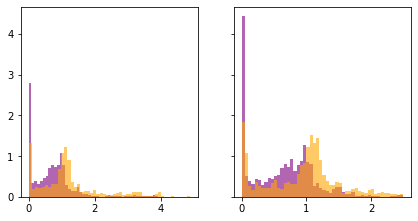

In [38]:
f, ax = plt.subplots(1,2, figsize = (7,7/2), sharey = True)
# f1, ax1 = plt.subplots(1,2, figsize = (7,7/2), sharex = True, sharey = True)

ax = ax.ravel()
# ax1 = ax1.ravel()
listHist = pd.DataFrame()
for light, c in zip(['L0.1', 'L50'], ['purple', 'orange']):
    subset = [l for l in names_first if light in l]
    uber = pd.DataFrame()
    
    for name in subset:
        if automatedTracking[name] :
            direc = os.path.join(r"./dataFolders/Output/Proboscis/FilteredTracks/FirstVisit/")
            datalist = glob.glob(direc + '*.csv')
            data = [f for f in datalist if name in f][0]
            
        else:
            direc = os.path.join(r"./dataFolders/Output/Proboscis/FilteredTracks/ManuallyTracked/")
            datalist = glob.glob(direc + '*.csv')
            data = [f for f in datalist if name + '_' + visit[:-1] in f][0]
     
        
        df = pd.read_csv(data)
        uber = uber.append(df)
       
    for limit, axes, in zip([5, 2.5], ax):
        r = uber.loc[uber.r < limit, 'r']
#         kernel = stats.gaussian_kde(r)
#         kernel.set_bandwidth(kernel.factor/3)

        histogram, positions, _ = axes.hist(r, bins = 50, density = True, 
                                            color = c,
                                           alpha = 0.6)
        name = light + '_' + str(limit)
        listHist[name] = histogram
#         pde = kernel(positions)
#         axes[i].plot(positions, pde)
#         axes[i].set_title()


In [40]:
listHist.head()

,L0.1_5,L0.1_2.5,L50_5,L50_2.5
0,2.803049,4.445314,1.319292,1.824067
1,0.334571,0.520879,0.185294,1.074897
2,0.391692,0.378173,0.248294,0.260581
3,0.318250,0.313955,0.218647,0.154720
4,0.387612,0.435255,0.248294,0.358299


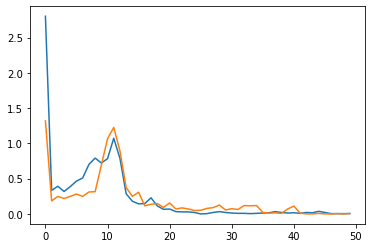

In [43]:
plt.plot(listHist.index, listHist['L0.1_5'])
plt.plot(listHist.index, listHist['L50_5'])

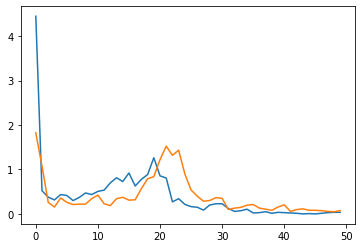

In [44]:
plt.plot(listHist.index, listHist['L0.1_2.5'])
plt.plot(listHist.index, listHist['L50_2.5'])

In [47]:
stats.ks_2samp(listHist['L0.1_5'], listHist['L50_5'])

Ks_2sampResult(statistic=0.32, pvalue=0.011511738725894704)

In [48]:
stats.ks_2samp(listHist['L0.1_2.5'], listHist['L50_2.5'])

Ks_2sampResult(statistic=0.28, pvalue=0.039194586195352224)

## make histograms from All data

In [3]:
visit = 'FirstVisit'

In [4]:
mothAnnotation = pd.read_csv('./dataFolders/Output/Proboscis/TrackingErrors.csv')
mothAnnotation.head()

,name,Tracking,WithManualTracking,Unnamed: 3
0,L0.1_c-3_m2_FirstVisit,NO,YES,NaN
1,L0.1_c-3_m2_Lastvisit,NO,NO,NaN
2,L0.1_c-3_m5_FirstVisit,YES with removal,NaN,NaN
3,L0.1_c-3_m5_Lastvisit,YES with removal,NaN,NaN
4,L0.1_c-3_m8_FirstVisit,NO,YES,NaN


In [5]:
mothToBeRemoved = mothAnnotation.loc[(mothAnnotation.Tracking == 'NO') & 
                                     (mothAnnotation.WithManualTracking == 'NO'),
                                     'name']

In [6]:
listMoth = [l for l in mothToBeRemoved if visit in l]
# listMoth

In [7]:
manuallyTrackedMoth = ['L50_c-3_m9_FirstVisit']

In [8]:
direc = os.path.join(r"./dataFolders/Output/Proboscis/FilteredTracks/FirstVisit/")
filelist = glob.glob(direc + '*.csv')

In [9]:
radial_distance_low = []
radial_distance_high = []
name_low = []
name_high = []

for files in filelist:
    nameOffile = os.path.basename(files)[:-4]
    
    if nameOffile in listMoth:
#         print(nameOffile)
        continue
    elif nameOffile in manuallyTrackedMoth:
        direc = os.path.join(r"./dataFolders/Output/Proboscis/FilteredTracks/ManuallyTracked/")
        datalist = glob.glob(direc + '*.csv')
        data = [f for f in datalist if nameOffile in f][0]
    else:
        data = files
    
    # read in the r values
    df = pd.read_csv(data)
    r = df.r.values
    n = nameOffile

    if 'L0.1' in nameOffile:
        radial_distance_low.extend(r)
        name_low.append(n)
    elif 'L50' in nameOffile:
        radial_distance_high.extend(r)
        name_high.append(n)

In [10]:
[l for l in name_high if l in manuallyTrackedMoth]

['L50_c-3_m9_FirstVisit']

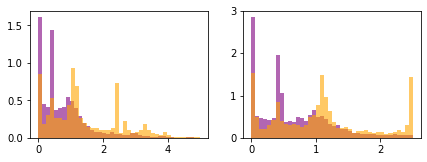

In [11]:
f, ax = plt.subplots(1, 2, figsize = (7,7/3))
ax = ax.ravel()

for limit, axes, in zip([5, 2.5], ax):
    r_high = [i for i in radial_distance_high if i < limit]
    r_low = [i for i in radial_distance_low if i < limit]
#         kernel = stats.gaussian_kde(r)
#         kernel.set_bandwidth(kernel.factor/3)
    histogram, positions, _ = axes.hist(r_low, bins = 40, density = True, 
                                        color = 'purple',
                                       alpha = 0.6)
    
    histogram, positions, _ = axes.hist(r_high, bins = 40, density = True, 
                                        color = 'orange',
                                       alpha = 0.6)
# plt.savefig('./dataFolders/Output/Proboscis/Plots/RepresentativePlots/Histogram_RadialPosition.pdf')

In [12]:
limit = 5
r_high = [i for i in radial_distance_high if i < limit]
r_low = [i for i in radial_distance_low if i < limit]

In [13]:
stats.mannwhitneyu(~np.isnan(radial_distance_high), ~np.isnan(radial_distance_low))

MannwhitneyuResult(statistic=91505028.5, pvalue=7.594258668416813e-71)

In [14]:
stats.ks_2samp(~np.isnan(radial_distance_high), ~np.isnan(radial_distance_low))

Ks_2sampResult(statistic=0.033775218552654654, pvalue=8.18778389529021e-07)

## Visualize as heat maps

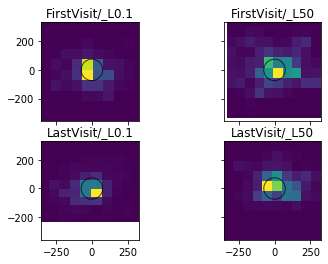

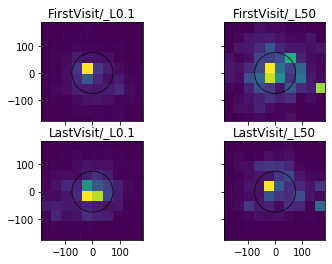

In [40]:
f, ax = plt.subplots(2,2, sharex = True, sharey = True)
ax = ax.ravel()

f0, ax0 = plt.subplots(2,2, sharex = True, sharey = True)
ax0 = ax0.ravel()


i = 0
for visit in visitnum:
    datalist = glob.glob(direc + visit + '*.csv')
    
    for light in ['L0.1', 'L50']:
        subset = [l for l in datalist if light in l]
        df = pd.DataFrame()
        for dd in subset:
            ff = pd.read_csv(dd)
            df = df.append(ff)
            
        x = df.loc[df.r < 5, 'x_centered']
        y = df.loc[df.r < 5, 'y_centered']
        ax[i].hist2d(x,y)
        c1 = plt.Circle((0, 0), 75, 
                        facecolor='none', alpha = 0.7,
                    edgecolor= 'black', linewidth = 1)
        ax[i].add_artist(c1)
        ax[i].set_aspect('equal')
        ax[i].set_title(visit + '_' + light)
        
        x = df.loc[df.r < 2.5, 'x_centered']
        y = df.loc[df.r < 2.5, 'y_centered']
        ax0[i].hist2d(x,y)
        c1 = plt.Circle((0, 0), 75, 
                        facecolor='none', alpha = 0.7,
                    edgecolor= 'black', linewidth = 1)
        ax0[i].add_artist(c1)
        ax0[i].set_aspect('equal')
        ax0[i].set_title(visit + '_' + light)
        i+=1